In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load datasets
train = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

# Display their shapes
print("Train shape:", train.shape)
print("Features shape:", features.shape)
print("Stores shape:", stores.shape)


Train shape: (421570, 5)
Features shape: (8190, 12)
Stores shape: (45, 3)


In [3]:
# Merge train and features on 'Store' and 'Date'
merged_df = pd.merge(train, features, on=['Store', 'Date'], how='left')

# Merge with stores on 'Store'
final_df = pd.merge(merged_df, stores, on='Store', how='left')

# Check shape
print("Final merged shape:", final_df.shape)


Final merged shape: (421570, 17)


In [4]:
# Check nulls
print("\nMissing values before cleaning:\n")
print(final_df.isnull().sum())

# Fill missing 'MarkDown' columns with 0 (assumed no markdown that week)
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
final_df[markdown_cols] = final_df[markdown_cols].fillna(0)

# Drop any remaining missing values (like CPI, Unemployment)
final_df.dropna(inplace=True)

print("\nMissing values after cleaning:\n")
print(final_df.isnull().sum())



Missing values before cleaning:

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

Missing values after cleaning:

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64


In [5]:
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month
final_df['Day'] = final_df['Date'].dt.day

# Filter out records before 2010 if needed
final_df = final_df[final_df['Year'] >= 2010]


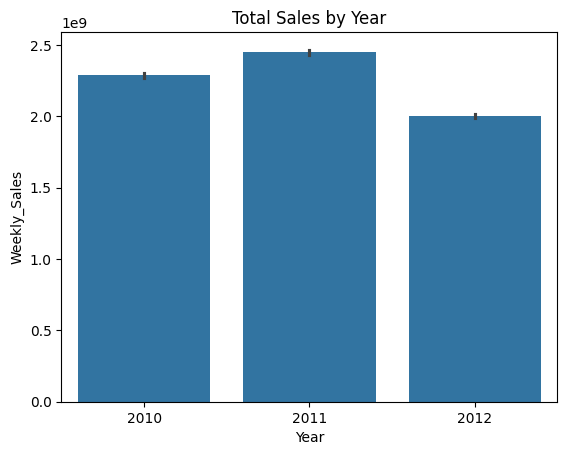

In [6]:
##sales by year
sns.barplot(x='Year', y='Weekly_Sales', data=final_df, estimator=np.sum)
plt.title("Total Sales by Year")
plt.show()


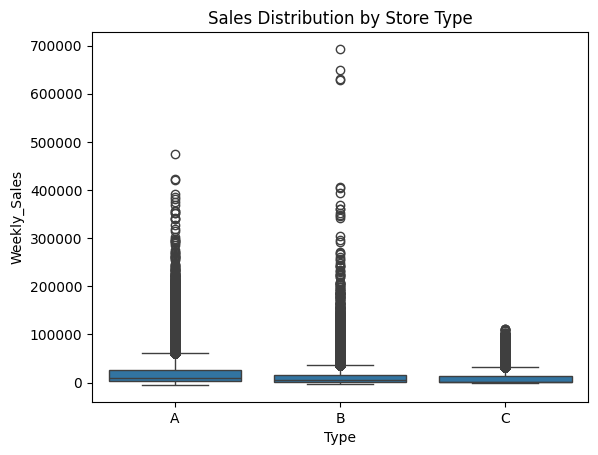

In [7]:
##Sales by Store Type
sns.boxplot(x='Type', y='Weekly_Sales', data=final_df)
plt.title("Sales Distribution by Store Type")
plt.show()


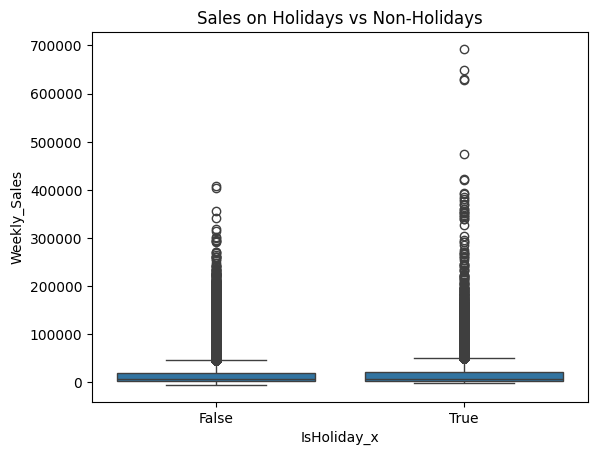

In [8]:
##effects of holiday
sns.boxplot(x='IsHoliday_x', y='Weekly_Sales', data=final_df)
plt.title("Sales on Holidays vs Non-Holidays")
plt.show()


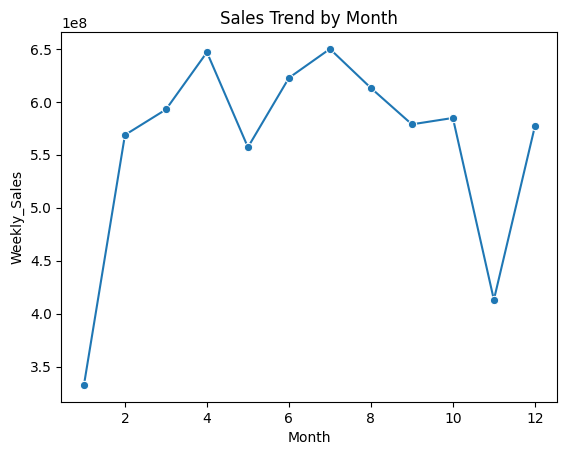

In [9]:
##sales by month
monthly_sales = final_df.groupby('Month')['Weekly_Sales'].sum().reset_index()
sns.lineplot(x='Month', y='Weekly_Sales', data=monthly_sales, marker='o')
plt.title("Sales Trend by Month")
plt.show()


In [10]:
final_df.to_csv("final_df.csv", index=False)
print("✅ Saved final clean dataset as `final_df.csv`")


✅ Saved final clean dataset as `final_df.csv`
